In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import csv
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("./서울특별시 일반음식점 인허가 정보.csv", encoding='cp949')
print(df.columns)

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수',
       '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모',
       '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')


In [8]:
df = df[['도로명주소' , '사업장명', '업태구분명', '좌표정보(X)', '좌표정보(Y)']]
df.head()

,도로명주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
0,NaN,일식동경,일식,NaN,NaN
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식,198867.7026,451824.2811
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식,193687.3482,442284.1640
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식,189814.3059,443046.2399
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,기타,204776.5483,444677.6430


In [9]:
df.isna().sum()

도로명주소      1698
사업장명          1
업태구분명        11
좌표정보(X)    1655
좌표정보(Y)    1655
dtype: int64

In [10]:
df = df.dropna()
df.head()

,도로명주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식,198867.7026,451824.2811
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식,193687.3482,442284.1640
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식,189814.3059,443046.2399
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,기타,204776.5483,444677.6430
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),메이크데이(MakeDay),기타,202114.2284,452392.0938


In [11]:
df["업태구분명"].value_counts().sort_index()

감성주점                223
경양식                9228
기타                17812
김밥(도시락)             583
까페                 2092
냉면집                 103
라이브카페               190
복어취급                 51
분식                 9048
뷔페식                 457
식육(숯불구이)            882
외국음식전문점(인도태국등)     1370
이동조리                  7
일식                 6118
전통찻집                 51
정종/대포집/소주방         2229
중국식                4531
출장조리                100
커피숍                   3
키즈카페                 66
탕류(보신용)             143
통닭(치킨)             2530
패밀리레스트랑             171
패스트푸드               705
한식                52145
호프/통닭             10353
회집                  276
횟집                  295
Name: 업태구분명, dtype: int64

In [23]:
separated_dict = {'경양식':'양식','뷔페식':'양식','패밀리레스트랑':'양식',
'회집':'해산물','횟집':'해산물','복어취급':'해산물',
'분식':'분식','냉면집':'분식','김밥(도시락)':'분식',
'통닭(치킨)':'치킨','호프/통닭':'치킨',
'한식':'한식','탕류(보신용)':'한식',
'커피숍':'카페','까페':'카페','키즈카페':'카페','라이브카페':'카페','전통찻집':'카페','기타':'카페',
'정종/대포집/소주방':'술집','감성주점':'술집',
'식육(숯불구이)':'고기',
'중국식':'중식',
'외국음식전문점(인도태국등)':'외국음식'}

for i, j in separated_dict.items():
    print(separated_dict[i])

# food_list = df["업태구분명"].to_list()
# for i, j in enumerate(food_list):
#     for x, y in enumerate(a):
#         if j in y:
#             food_list[i] = b[x]
            
# df.insert(3,'업종',food_list)
# df = df.drop(columns='업태구분명')
# df = df[df['업종'] != 'exceoption']
# df.head()

KeyError: '양식'

In [12]:
address_list = df['도로명주소'].to_list()
address_list

['서울특별시 종로구 삼일대로 382 (관철동)',
 '서울특별시 관악구 신림로59길 15-13 4층 (신림동)',
 '서울특별시 구로구 구로동로22길 21 1층 (구로동)',
 '서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동)',
 '서울특별시 동대문구 난계로30길 28-7 1층 (신설동)',
 '서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동)',
 '서울특별시 강남구 논현로150길 13 혜창빌딩 지상1층 (논현동)',
 '서울특별시 강북구 수유로12길 60 1층 (수유동)',
 '서울특별시 영등포구 의사당대로1길 25 하남빌딩 2층 202호 203(일부)호 (여의도동)',
 '서울특별시 강남구 테헤란로52길 21 역삼동 벤처빌딩 지하1층 4호 (역삼동)',
 '서울특별시 관악구 신림로22길 5 대학당 지하1층 (신림동)',
 '서울특별시 중랑구 봉우재로 155 1층 105호 (상봉동)',
 '서울특별시 서초구 강남대로99길 35 1층 102호 (잠원동)',
 '서울특별시 강서구 곰달래로 93 1층 (화곡동)',
 '서울특별시 영등포구 선유로47길 15 구산드림타워 1층 108-1호 (양평동4가)',
 '서울특별시 강동구 구천면로47길 20 1층 (암사동)',
 '서울특별시 종로구 창신길 78 1층 (창신동)',
 '서울특별시 성동구 아차산로1길 12 1층 (성수동1가)',
 '서울특별시 관악구 보라매로3길 10 1층 (봉천동)',
 '서울특별시 노원구 공릉로46길 32 상가동 1층 110-1호 (공릉동 삼익아파트)',
 '서울특별시 서초구 강남대로97길 23 1층 (잠원동)',
 '서울특별시 서초구 강남대로105길 5 12층 (잠원동)',
 '서울특별시 구로구 서해안로 2102 솔보프라자 1층 103 105호 (항동)',
 '서울특별시 강동구 강동대로53길 93 1층 101102호 (성내동)',
 '서울특별시 중구 필동로 24-5 1~2층 (필동2가)',
 '서울특별시 성북구 종암로25길 22-29 1층 (종암동)',
 '

In [13]:
gu_list = [address_list[i].split()[1] for i in range(len(address_list))]
gu_list

['종로구',
 '관악구',
 '구로구',
 '강남구',
 '동대문구',
 '은평구',
 '강남구',
 '강북구',
 '영등포구',
 '강남구',
 '관악구',
 '중랑구',
 '서초구',
 '강서구',
 '영등포구',
 '강동구',
 '종로구',
 '성동구',
 '관악구',
 '노원구',
 '서초구',
 '서초구',
 '구로구',
 '강동구',
 '중구',
 '성북구',
 '중구',
 '구로구',
 '관악구',
 '강남구',
 '도봉구',
 '용산구',
 '강북구',
 '구로구',
 '강남구',
 '광진구',
 '송파구',
 '강동구',
 '마포구',
 '강서구',
 '서초구',
 '강서구',
 '영등포구',
 '관악구',
 '강동구',
 '강서구',
 '마포구',
 '마포구',
 '송파구',
 '송파구',
 '중구',
 '은평구',
 '관악구',
 '강남구',
 '관악구',
 '금천구',
 '마포구',
 '관악구',
 '성동구',
 '동대문구',
 '마포구',
 '은평구',
 '마포구',
 '마포구',
 '중랑구',
 '마포구',
 '송파구',
 '서초구',
 '노원구',
 '마포구',
 '용산구',
 '종로구',
 '서초구',
 '서초구',
 '강북구',
 '광진구',
 '서초구',
 '서초구',
 '마포구',
 '송파구',
 '마포구',
 '송파구',
 '송파구',
 '노원구',
 '동작구',
 '서초구',
 '서초구',
 '송파구',
 '서초구',
 '강남구',
 '서초구',
 '광진구',
 '서초구',
 '서초구',
 '서초구',
 '은평구',
 '성북구',
 '구로구',
 '강남구',
 '서초구',
 '서초구',
 '도봉구',
 '서초구',
 '서초구',
 '강동구',
 '동작구',
 '강동구',
 '구로구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '강남구',
 '강남구',
 '용산구',
 '강남구',
 '송파구',
 '광진구',
 '광진구',
 '마포구',
 '용산구',
 '송파구',
 '송파구',
 '강남구',
 '관악구'

In [14]:
dong_list = []
for i in range(len(address_list)):
    try:
        dong_list.append(re.findall('\(.+동',address_list[i])[0].split()[0][1:].split('(')[0]) #정규표현식
    except:
        dong_list.append('error')

In [15]:
for i in dong_list:
    print(i)

관철동
신림동
구로동
대치동
신설동
응암동
논현동
수유동
일부)호
역삼동
신림동
상봉동
잠원동
화곡동
양평동
암사동
창신동
성수동
봉천동
공릉동
잠원동
잠원동
항동
성내동
필동
종암동
error
구로동
봉천동
율현동
창동
서계동
우이동
구로동
도곡동
화양동
송파동
상일동
당인동
마곡동
서초동
마곡동
영등포동
봉천동
천호동
마곡동
연남동
연남동
신천동
잠실동
error
신사동
봉천동
신사동
봉천동
가산동
공덕동
봉천동
금호동
제기동
상수동
진관동
서교동
서교동
중화동
연남동
문정동
서초동
상계동
염리동
한남동
삼청동
양재동
양재동
미아동
군자동
서초동
반포동
상수동
문정동
서교동
잠실동
삼전동
상계동
사당동
양재동
서초동
삼전동
서초동
역삼동
서초동
구의동
양재동
서초동
서초동
구산동
동선동
구로동
신사동
서초동
서초동
창동
서초동
서초동
성내동
사당동
상일동
가리봉동
서초동
서초동
서초동
서초동
청담동
역삼동
한남동
자곡동
잠실동
중곡동
광장동
창전동
보광동
삼전동
석촌동
신사동
봉천동
대림동
용답동
신천동
용두동
독산동
하월곡동
창동
창동
흥인동
성수동
응암동
논현동
망원동
방이동
석촌동
시흥동
당산동
신정동
가양동
성수동
목동
역삼동
성북동
논현동
화곡동
공릉동
암사동
신사동
가산동
북아현동
error
면목동
서교동
삼전동
방배동
신림동
번동
도곡동
잠원동
망원동
오류동
서교동
서초동
마천동
성내동
신림동
하왕십리동
양평동
쌍문동
망우동
서초동
성산동
성내동
성산동
봉천동
독산동
영등포동
서교동
잠원동
묵동
잠원동
잠원동
서초동
잠원동
신내동
구로동
구로동
잠원동
면목동
상계동
수유동
논현동
등촌동
천호동
서초동
염리동
서초동
면목동
삼성동
서초동
서초동동
응암동
잠원동
양평동
사당동
서초동
서초동
창천동
서초동
잠원동
잠원동
시흥동지상1층
잠원동
논현동
봉천동
당산동
잠원동
서초동
서초동
이태원동
이태원동
잠원동
잠원동
잠원동
서초동
미아동
천호동
당산동
잠원동
잠원동
서초동
서초동
서초동
서초동
서초동
상봉동
서초동
서초동
잠원동
잠원동
서초동
서초동


In [16]:
cnt_list = Counter(dong_list)
cnt_list

Counter({'관철동': 360,
         '신림동': 2407,
         '구로동': 2094,
         '대치동': 1350,
         '신설동': 208,
         '응암동': 707,
         '논현동': 2016,
         '수유동': 1448,
         '일부)호': 64,
         '역삼동': 3050,
         '상봉동': 618,
         '잠원동': 463,
         '화곡동': 2210,
         '양평동': 587,
         '암사동': 427,
         '창신동': 430,
         '성수동': 1641,
         '봉천동': 2150,
         '공릉동': 757,
         '항동': 39,
         '성내동': 1001,
         '필동': 255,
         '종암동': 278,
         'error': 4257,
         '율현동': 20,
         '창동': 788,
         '서계동': 98,
         '우이동': 168,
         '도곡동': 495,
         '화양동': 887,
         '송파동': 557,
         '상일동': 167,
         '당인동': 11,
         '마곡동': 852,
         '서초동': 2143,
         '영등포동': 993,
         '천호동': 1053,
         '연남동': 718,
         '신천동': 412,
         '잠실동': 1006,
         '신사동': 2247,
         '가산동': 1008,
         '공덕동': 385,
         '금호동': 360,
         '제기동': 443,
         '상수동': 327,
         '진관동': 298,
 

In [17]:
# for i in cnt_list:
#     if cnt_list[i] < 50:
#         print(i)
        
error_list = [i for i in cnt_list if cnt_list[i] < 50]

for i,j in enumerate(dong_list):
    if j in error_list:
        dong_list[i] = 'error'

In [18]:
Counter(dong_list)

Counter({'관철동': 360,
         '신림동': 2407,
         '구로동': 2094,
         '대치동': 1350,
         '신설동': 208,
         '응암동': 707,
         '논현동': 2016,
         '수유동': 1448,
         '일부)호': 64,
         '역삼동': 3050,
         '상봉동': 618,
         '잠원동': 463,
         '화곡동': 2210,
         '양평동': 587,
         '암사동': 427,
         '창신동': 430,
         '성수동': 1641,
         '봉천동': 2150,
         '공릉동': 757,
         'error': 7600,
         '성내동': 1001,
         '필동': 255,
         '종암동': 278,
         '창동': 788,
         '서계동': 98,
         '우이동': 168,
         '도곡동': 495,
         '화양동': 887,
         '송파동': 557,
         '상일동': 167,
         '마곡동': 852,
         '서초동': 2143,
         '영등포동': 993,
         '천호동': 1053,
         '연남동': 718,
         '신천동': 412,
         '잠실동': 1006,
         '신사동': 2247,
         '가산동': 1008,
         '공덕동': 385,
         '금호동': 360,
         '제기동': 443,
         '상수동': 327,
         '진관동': 298,
         '서교동': 1817,
         '중화동': 424,
         '문정동': 1

In [19]:
df.insert(1,'구',gu_list)
df.insert(2,'동',dong_list)
df.head()

,도로명주소,구,동,사업장명,업종,좌표정보(X),좌표정보(Y)
1,서울특별시 종로구 삼일대로 382 (관철동),종로구,관철동,상해,분식,198867.702591,451824.281126
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),관악구,신림동,미쿠,일식,193687.348199,442284.164025
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),구로구,구로동,여름엔빙수겨울엔떡국,한식,189814.305919,443046.239859
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),강남구,대치동,카페디퍼,카페,204776.548264,444677.642985
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),동대문구,신설동,메이크데이(MakeDay),카페,202114.228397,452392.093759


In [20]:
df = df.drop(columns='도로명주소')
df = df[df['동'] != 'error']

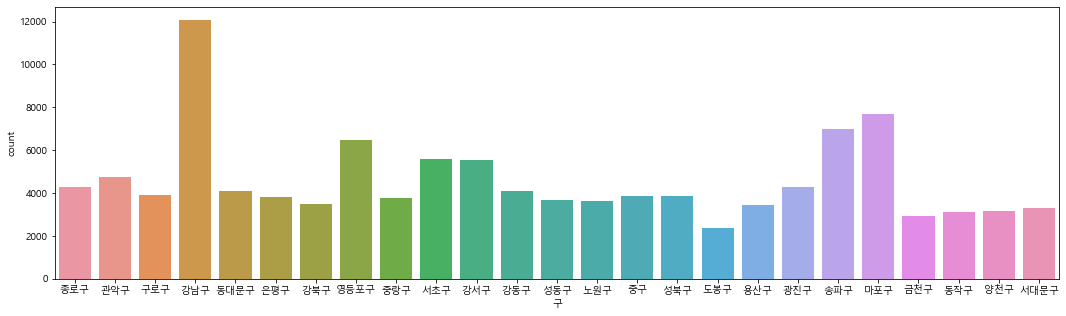

In [21]:
plt.figure(figsize=(18,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['구'])
plt.show()

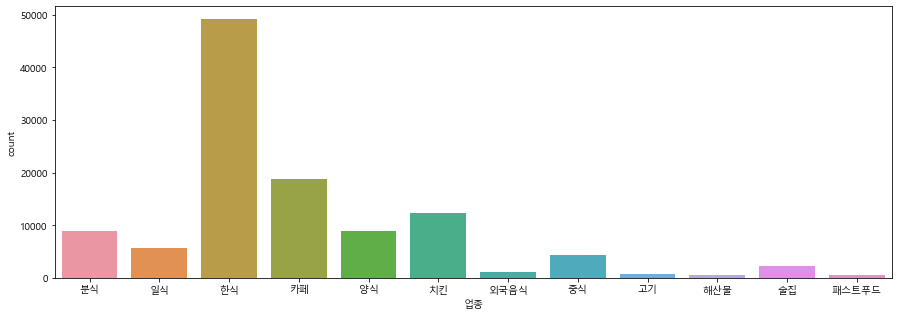

In [22]:
plt.figure(figsize=(15,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['업종'])
plt.show()

In [23]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114055 entries, 0 to 114054
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   구        114055 non-null  object 
 1   동        114055 non-null  object 
 2   사업장명     114055 non-null  object 
 3   업종       114055 non-null  object 
 4   좌표정보(X)  114055 non-null  float64
 5   좌표정보(Y)  114055 non-null  float64
dtypes: float64(2), object(4)
memory usage: 5.2+ MB


In [24]:
df.head(10)

,구,동,사업장명,업종,좌표정보(X),좌표정보(Y)
0,종로구,관철동,상해,분식,198867.702591,451824.281126
1,관악구,신림동,미쿠,일식,193687.348199,442284.164025
2,구로구,구로동,여름엔빙수겨울엔떡국,한식,189814.305919,443046.239859
3,강남구,대치동,카페디퍼,카페,204776.548264,444677.642985
4,동대문구,신설동,메이크데이(MakeDay),카페,202114.228397,452392.093759
5,은평구,응암동,달의 작업실(Lalune),한식,192540.370555,454712.243026
6,강남구,논현동,숯칼 도산 숯닭갈비,한식,202545.473911,446358.225573
7,강북구,수유동,테트리스찜닭 수유미아점,한식,201836.387383,458885.456680
8,영등포구,일부)호,블러프라운지,카페,193717.614336,446460.363568
9,강남구,역삼동,탐라정성돈카츠(탐정돈),일식,204222.892947,444524.822712


In [25]:
print('자치구 목록:', end= ' ')
for i in list(df.groupby('구').count().index):
    print(i, end=', ')
print()
print('원하시는 자치구를 입력해주세요:')
gu = input()

print('자치동 목록:', end=' ')
for i in list(df[df['구'] == gu].groupby('동').count().index):
    print(i, end=', ')
print()
print('원하시는 자치동을 입력해주세요:')
dong = input()

print('음식종류 목록: 상관없음', end=', ')
for i in list(df.groupby('업종').count().index):
    print(i, end=', ')
print()
print('원하시는 음식종류를 입력해주세요:')
food = input()

if food == '상관없음':
    food_list = df[df['구'] == gu][df['동'] == dong]['사업장명'].tolist()
else:
    food_list = df[df['구'] == gu][df['동'] == dong][df['업종'] == food]['사업장명'].tolist()

keyword_list = [gu+' '+dong+' '+i for i in food_list]
#동작구 흑석동 상관없음

자치구 목록: 강남구, 강동구, 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중구, 중랑구, 
원하시는 자치구를 입력해주세요:
자치동 목록: 개포동, 논현동, 대치동, 도곡동, 삼성동, 세곡동, 수서동, 신사동, 압구정동, 역삼동, 일부)호, 일원동, 자곡동, 청담동, 
원하시는 자치동을 입력해주세요:
음식종류 목록: 상관없음, 고기, 분식, 술집, 양식, 외국음식, 일식, 중식, 치킨, 카페, 패스트푸드, 한식, 해산물, 
원하시는 음식종류를 입력해주세요:


In [28]:
keyword_df = pd.DataFrame(keyword_list)
keyword_df

,0
0,강남구 개포동 레몬그라스 타이
1,강남구 개포동 장어미식가 개포2호점
2,강남구 개포동 교촌치킨 개포2호점
3,강남구 개포동 도헤(Dorer)
4,강남구 개포동 돈바치
...,...
386,강남구 개포동 비비큐BBQ 개포대청역점
387,강남구 개포동 북경
388,강남구 개포동 혼(Hone)
389,강남구 개포동 윤이네


In [29]:
keyword_df.to_csv('Seoul.csv', index=False)